# Stellar classification notebook

### Dataset information

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rerun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

#### Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data

In [2]:
data_dir = os.path.join(os.getcwd(),'data')
stellar_data_path = os.path.join(data_dir,'star_classification.csv')
df = pd.read_csv(stellar_data_path)

#### First look at the data

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
print(f'Number of examples in the dataset : {df.shape[0]}')
print(f'Number of features : {df.shape[1]-1}')

Number of examples in the dataset : 100000
Number of features : 17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
print(f'Number of missing values : {np.sum(df.isnull().sum())}')
print(f'Number of duplicated rows : {df.duplicated().sum()}')

Number of missing values : 0
Number of duplicated rows : 0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [8]:
df['rerun_ID'].unique()

array([301], dtype=int64)

- Feature obj_ID is unique to each example, we will remove it 
- Feature rerun_ID only takes one value, we will remove it

In [9]:
# Removing useless columns
df = df.drop(['obj_ID','rerun_ID'], axis = 1)

In [10]:
num_features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
cat_features = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]
cat_features.remove('class')
print(f'Numerical features : {num_features}')
print(f'Categorical features : {cat_features}')

Numerical features : ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']
Categorical features : []


#### Exploratory Analysis

C:\Users\antoi\AppData\Local\Temp\ipykernel_10484\3943720160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'class', palette = 'bright')


<Axes: xlabel='class', ylabel='count'>

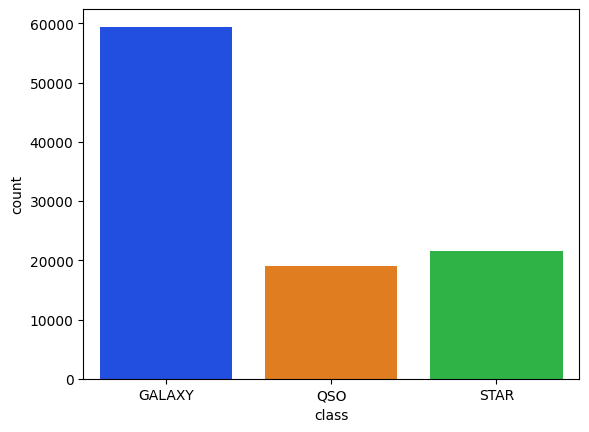

In [11]:
sns.countplot(data = df, x = 'class', palette = 'bright')

In [12]:
n_galaxy = df[df['class'] == 'GALAXY'].shape[0]
n_QSO = df[df['class'] == 'QSO'].shape[0]
n_star = df[df['class'] == 'STAR'].shape[0]

galaxy_qso_ratio = n_galaxy/n_QSO
galaxy_star_ratio = n_galaxy/n_star

print(f'Galaxy/Quasar ratio : {galaxy_qso_ratio:.2f}')
print(f'Galaxy/star ratio : {galaxy_star_ratio:.2f}')


Galaxy/Quasar ratio : 3.14
Galaxy/star ratio : 2.75


The dataset is imbalanced : there are ~ 3 times more galaxies than Quasars and stars.
We will keep this in mind for future processing.

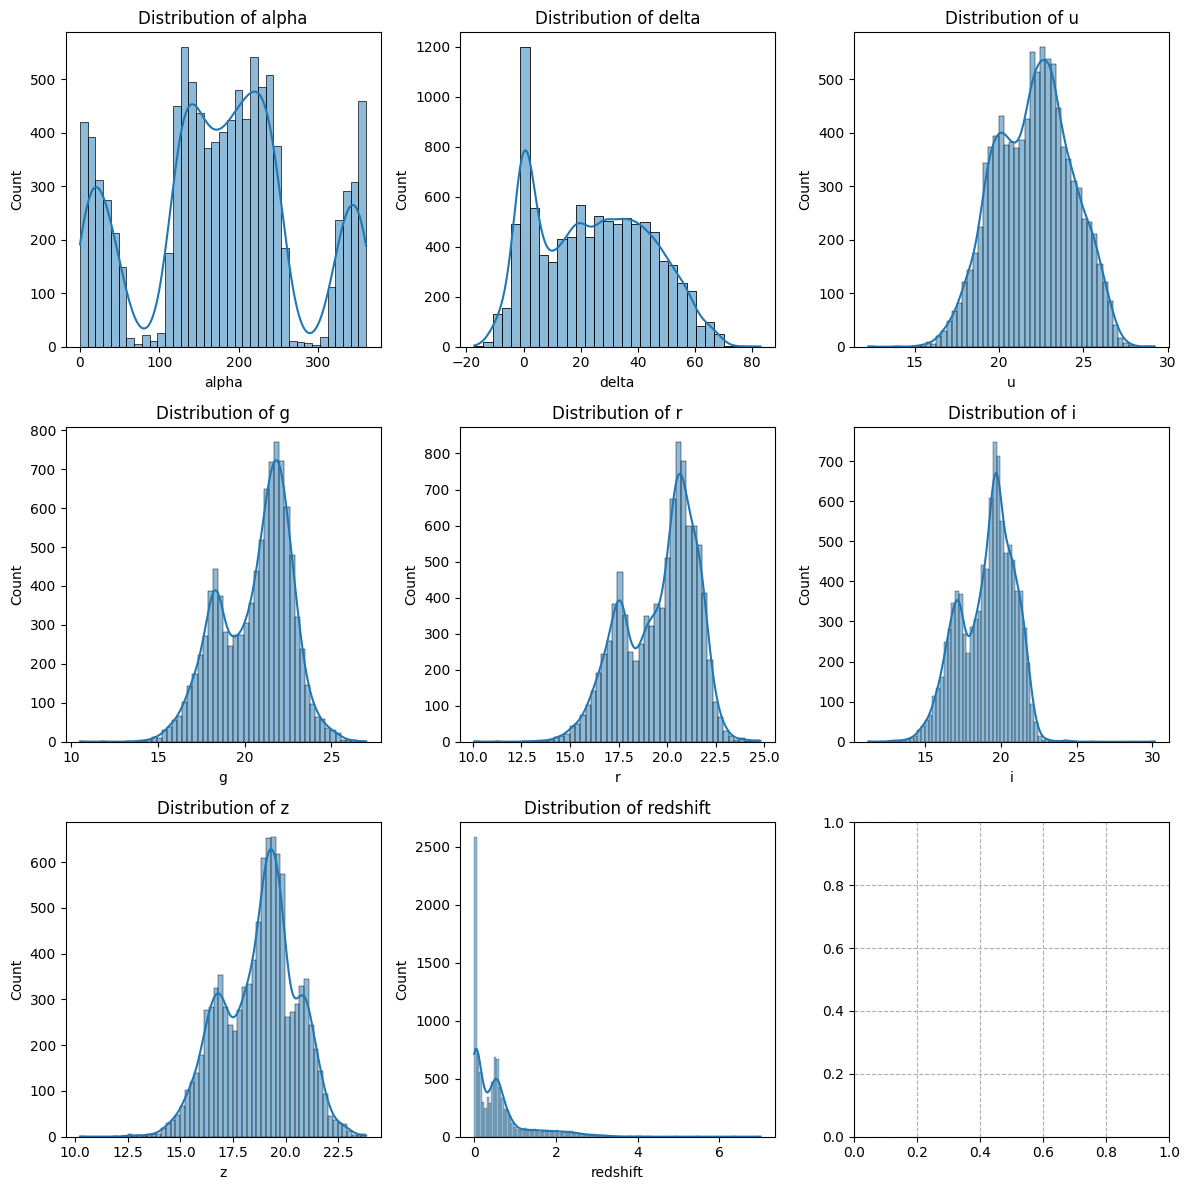

In [13]:
cols_to_plot = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']

# sampling the set for faster plotting
df_sample = df.sample(frac=0.1, random_state=42) # 10 000 examples
fig, axs = plt.subplots(3, 3, figsize = (12,12))

for i,col in enumerate(cols_to_plot):
    ax = axs.flatten()[i]
    sns.histplot(data = df_sample, x = col, edgecolor = 'black', kde = True, ax = ax)
    ax.set_title(f'Distribution of {col}')
    plt.grid(True, linestyle = '--')

plt.tight_layout()    

Most of the *non ID* features seem to follow a mixed gaussian distribution.

C:\Users\antoi\AppData\Local\Temp\ipykernel_10484\3633033249.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best', fontsize = 10)


<Figure size 1400x1400 with 0 Axes>

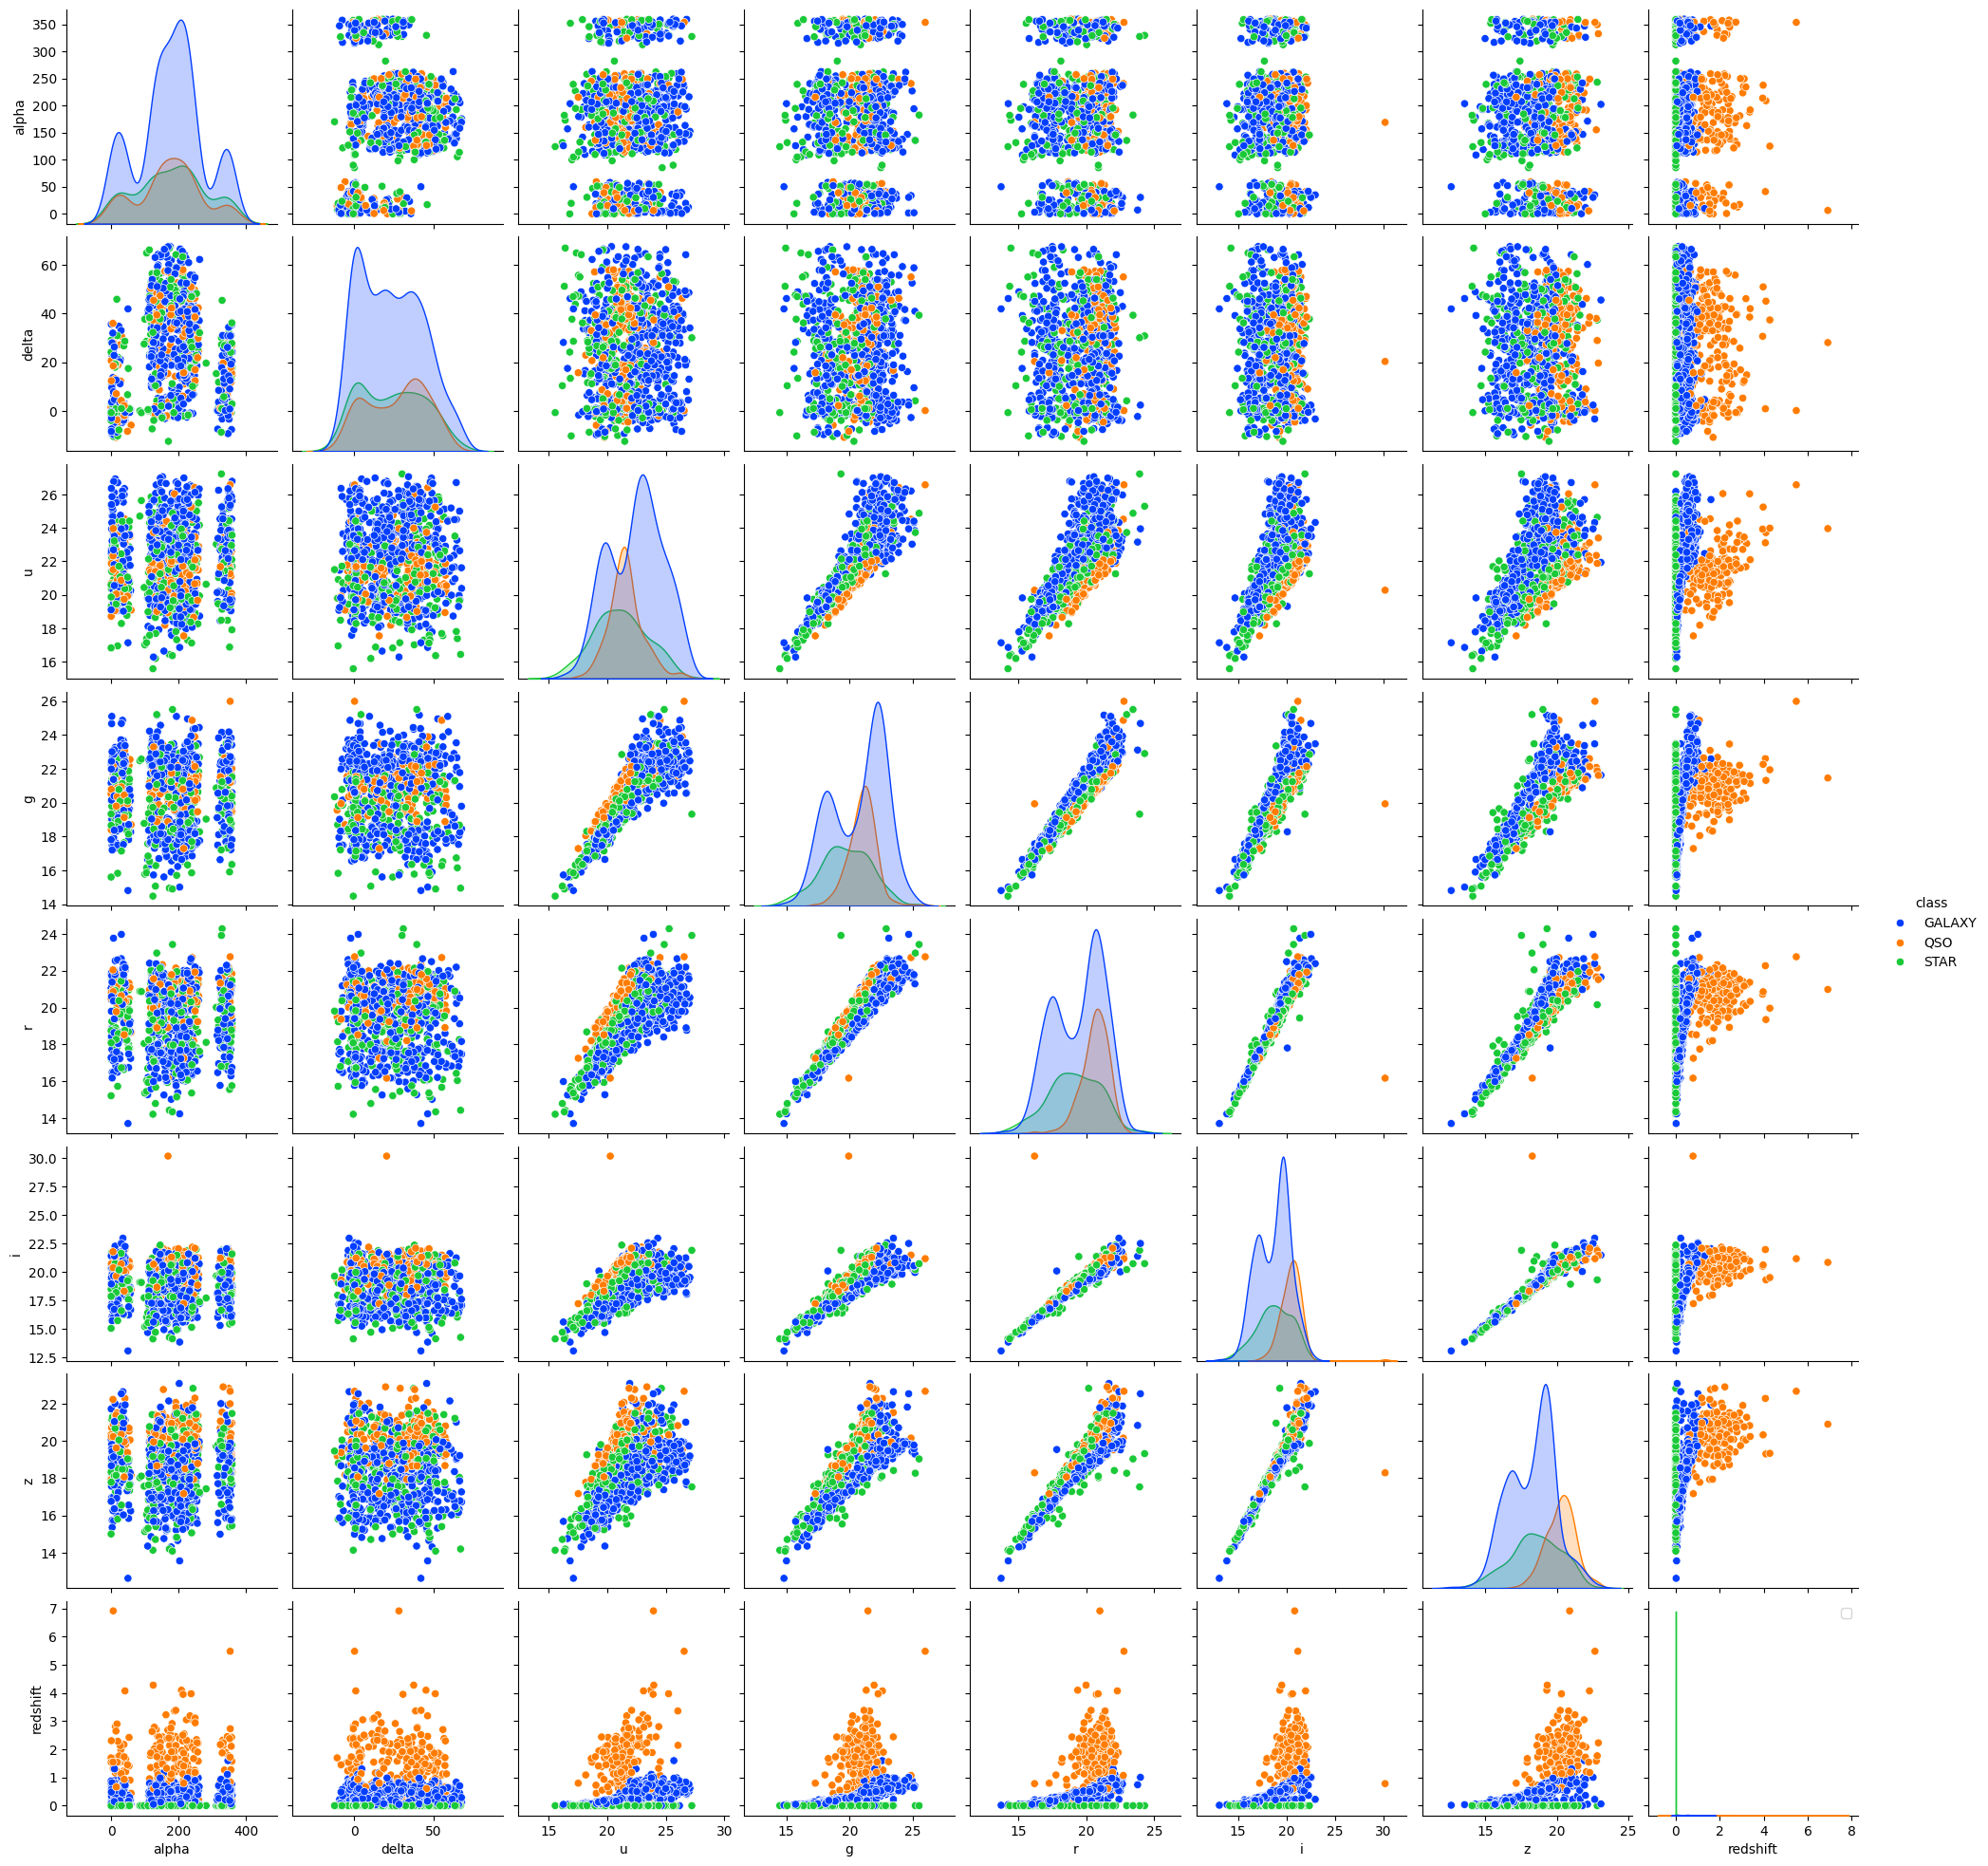

In [14]:
# resampling the set to faster pairplotting
df_resampled = df_sample.sample(frac = 0.1, random_state = 42) # 1000 examples
cols_to_plot.append('class')
df_resampled = df_resampled[cols_to_plot]

plt.figure(figsize = (14,14))
sns.pairplot(data = df_resampled, hue = 'class', palette = 'bright')
plt.legend(loc = 'best', fontsize = 10)
plt.show()

- Some features share a scattered linear relationship
- Feature redshift seems to be a good candidat for separating examples in the 3 classes

#### Outliers in the data

First we encode the labels 

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
for num_label, str_label in enumerate(label_encoder.classes_):
    print(f'{num_label} -> {str_label}')

0 -> GALAXY
1 -> QSO
2 -> STAR


In [16]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [17]:
n_outliers = (df[y_pred == -1]).shape[0]
print(f'We found {n_outliers} outliers using this method')
print(f'They represent {n_outliers/(df.shape[0])*100:.2f}% of the examples')

We found 15258 outliers using this method
They represent 15.26% of the examples


If we drop the outliers, the dataset will contain around 85 000 examples still. It seems acceptable to get rid of them. However, let us check the distribution of classes in this reduced dataset to make sure the imbalance doesn't get worse.

C:\Users\antoi\AppData\Local\Temp\ipykernel_10484\947986582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_reduced, x = 'class', palette = 'bright')


<Axes: xlabel='class', ylabel='count'>

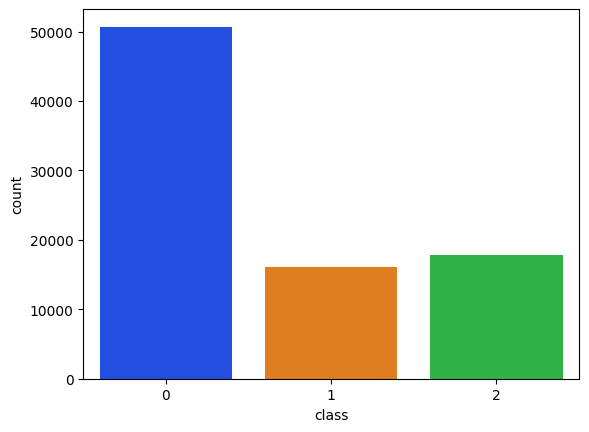

In [18]:
df_reduced = df[y_pred == 1].reset_index(drop = True)
sns.countplot(data = df_reduced, x = 'class', palette = 'bright')

The distribution of classes remains the same. 

#### Feature selection

<Axes: >

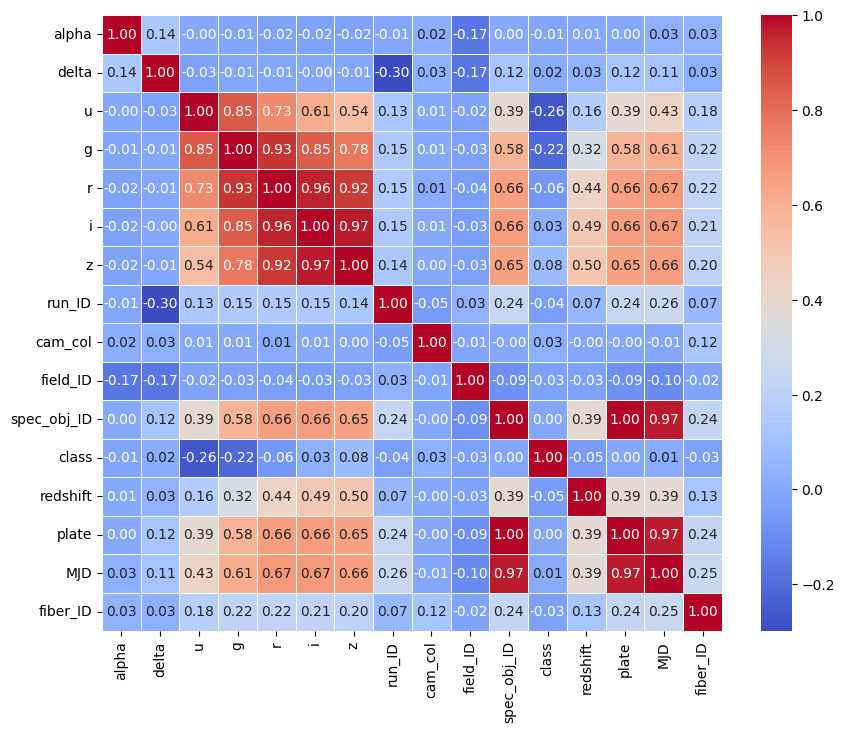

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(df_reduced.corr(), annot = True, fmt='.2f', linewidths=0.5, cmap = 'coolwarm')

The differences in value between the correlation of class with every feature are too weak to draw conclusions from the correlation matrix.

In [20]:
from sklearn.feature_selection import SelectKBest

y_kbest = df_reduced['class']
X_kbest = df_reduced.drop('class', axis = 1)

# number of features to select is chosen experimentally
feature_selector = SelectKBest(k = 10)
feature_selector.fit(X_kbest,y_kbest)
selected_features = feature_selector.get_support()
features_to_remove_kbest = np.array(X_kbest.columns[~selected_features])

features_to_remove_kbest

array(['alpha', 'delta', 'run_ID', 'cam_col', 'field_ID'], dtype=object)

From SelectKBest method, we eliminate some less relevant features.

In [21]:
df_reduced = df_reduced.drop(features_to_remove_kbest, axis = 1)

#### Data preprocessing

We will split the dataset into : 
- Training set 
- Validation set, to fine tune hyperparameters of the chosen model, during K Fold cross validation
- Test set to verify the accuracy of the model on unseen data, and its ability to generalize

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = df_reduced['class']
X = df_reduced.drop('class', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_train = pd.DataFrame(X_train_scaled, columns = X.columns, index = X_train.index) 
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns = X.columns, index = X_test.index)


#### Model selection 

We will train several simple models, test their performance, and then finetune the hyperparameter of the best performing model.

We will train the models on 25% of the actual training set. The idea here is to see what model performs best, so we can fine tune it and then perform a complete training.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# training the models on sampled datasets to accelerate the training
X_train_sampled = X_train.sample(frac = 0.25, random_state = 42)
y_train_sampled = y_train.loc[X_train_sampled.index]

models = {'Logistic regression' : LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', class_weight = 'balanced'), 
          'SVM' : SVC(class_weight = 'balanced'),
          'Random Forest' : RandomForestClassifier(class_weight = 'balanced')}

for model_name, model in models.items():
    model.fit(X_train_sampled,y_train_sampled)

c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [26]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

def models_evaluation(models):
    metrics = {}
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average = 'weighted')  
        recall = recall_score(y_test, y_pred, average = 'weighted')
        
        # Store each model's metrics in the main dictionary
        metrics[model_name] = {
            'accuracy': np.round(acc,3),
            'f1 score': np.round(f1,3),
            'recall score': np.round(recall,3)
        }
    
    return metrics

models_evaluation(models)

{'Logistic regression': {'accuracy': 0.934,
  'f1 score': 0.934,
  'recall score': 0.934},
 'SVM': {'accuracy': 0.949, 'f1 score': 0.949, 'recall score': 0.949},
 'Random Forest': {'accuracy': 0.975,
  'f1 score': 0.975,
  'recall score': 0.975}}

Random Forest model seems to be performing the best on the data. Let us now apply grid search to tune the hyperparameters of the model.

#### Hyperparamaters tuning

In [27]:
# from sklearn.model_selection import KFold, GridSearchCV

# random_forest_clf = models['Random Forest']
# n_estimator_scale = [50,100,150]
# max_depth_scale = [None, 10, 20]
# max_features_list = ['sqrt', 'log2']

# hyperparameters = {'n_estimators' : n_estimator_scale, 'max_depth' : max_depth_scale, 'max_features' : max_features_list}

# cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
# grid_search = GridSearchCV(estimator = random_forest_clf, param_grid = hyperparameters, cv=cv, scoring='accuracy')
# grid_search.fit(X_train_sampled, y_train_sampled)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [28]:
# tuned_model = grid_search.best_estimator_
# tuned_hyperparameters = grid_search.best_params_
# print(f'Tuned hyperparameters : {tuned_hyperparameters}')
# print(f'Best validation score : {grid_search.best_score_}')

Tuned hyperparameters : {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best validation score : 0.9749825350278665


In [ ]:
# Tuned hyperparameters : {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
# Best validation score : 0.9749825350278665
tuned_hyperparameters = {'max_depth' : 20, 'max_features' : 'sqrt', 'n_estimators' : 100}

#### Tuned model training 

In [29]:
clf = RandomForestClassifier(n_estimators = tuned_hyperparameters['n_estimators'], 
                             max_depth = tuned_hyperparameters['max_depth'],
                             max_features = tuned_hyperparameters['max_features'])

clf.fit(X_train,y_train)

tuned_models = {'Tuned Random Forest' : clf}

In [30]:
models_evaluation(tuned_models)

{'Tuned Random Forest': {'accuracy': 0.979,
  'f1 score': 0.979,
  'recall score': 0.979}}

Text(0.5, 1.0, 'Confusion matrix')

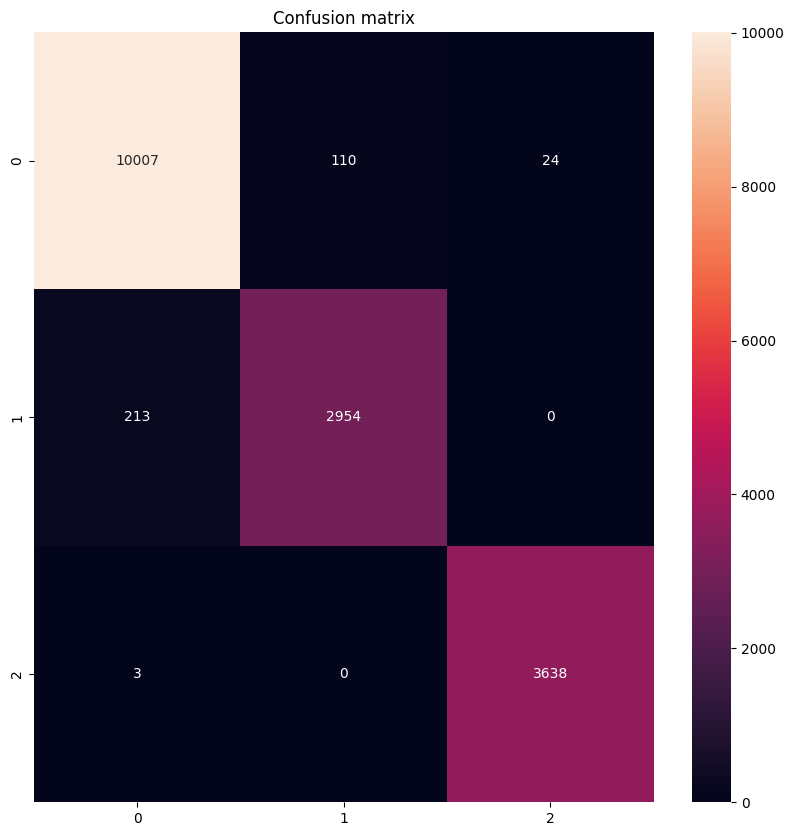

In [46]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

plt.figure(figsize= (10,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Confusion matrix')


We notice that the most common misclassifications are : 
- Galaxies classified as Quasars
- Quasars classified as galaxies

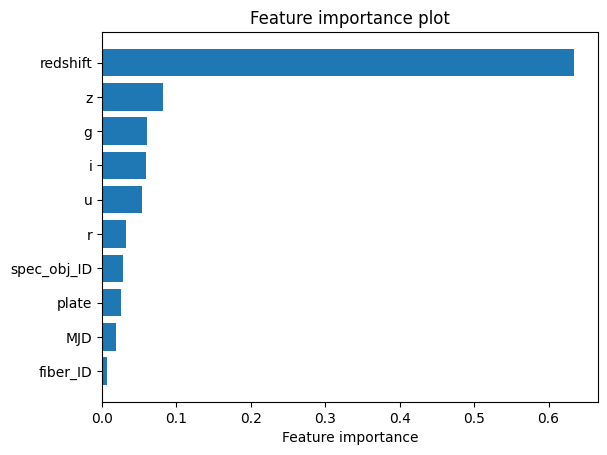

In [45]:
importances = clf.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel('Feature importance')
plt.title('Feature importance plot')
plt.show()


#### Perspectives for improvements 

- Try out other models such as boosted trees
- Perform grid search on other models as the selected one only performs slightly better than the others, and might show better performances once fine tuned
- Try removing additionnal features such as fiber_ID
- Check how the presence of outliers might impact the model
- Try different scalers like RobustScaler 